In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import linalg as LA
import matplotlib.patches as patches
from PIL import Image
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datapath = '../CS148/RedLights2011_Medium/'
file = 'RL-012.jpg'

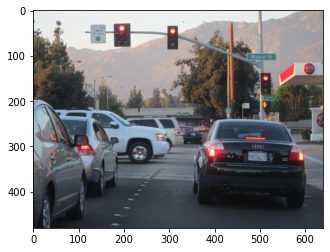

In [3]:
img=mpimg.imread(datapath+file)
imgplot = plt.imshow(img)
plt.show()

In [4]:
img.shape

(480, 640, 3)

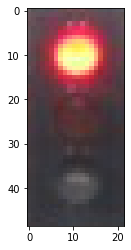

In [6]:
datapath = '../CS148/RedLights2011_Medium/'
rl_file = 'RL-012.jpg'
rl_img=mpimg.imread(datapath+rl_file)
init_redlightkernel = rl_img[36:85, 297:319, :]
imgplot = plt.imshow(init_redlightkernel)
plt.show()

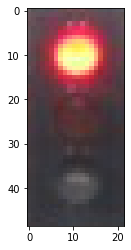

In [7]:
init_redlightkernel = rl_img[36:85, 297:319, :]
imgplot = plt.imshow(init_redlightkernel)
plt.show()

In [479]:
# downsample redlightkernel
scale_factor = 2
# redlightkernel = np.zeros((int(init_redlightkernel.shape[0]*scale), 
#                           int(init_redlightkernel.shape[1]*scale),
#                           int(init_redlightkernel.shape[2])))
#simple image scaling to (nR x nC) size
def scale(im, nR, nC):
    nR0 = len(im)     # source number of rows 
    nC0 = len(im[0])  # source number of columns 
    return np.array([[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  
             for c in range(nC)] for r in range(nR)])

nR = int(init_redlightkernel.shape[0]*scale_factor)
nC = int(init_redlightkernel.shape[1]*scale_factor)
redlightkernel = scale(init_redlightkernel, nR, nC)

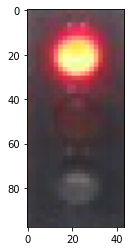

In [480]:
imgplot = plt.imshow(redlightkernel)
plt.show()

In [481]:
# dimensions of kernel
kernel_row_size = redlightkernel.shape[0]
kernel_col_size = redlightkernel.shape[1]
print("kernel_row_size", kernel_row_size)
print("kernel_col_size", kernel_col_size)

kernel_row_size 98
kernel_col_size 44


In [431]:
redlightkernel_flat = redlightkernel.flatten()

In [432]:
print(redlightkernel_flat.shape)

(12936,)


In [433]:
# normalize kernel
rlk_flat_norm = (redlightkernel_flat - np.min(redlightkernel_flat))/np.max(redlightkernel_flat)

In [434]:
np.max(rlk_flat_norm)

0.8705882352941177

In [435]:
# scroll over image
window_size=15 # pixels
MAX_ROWS = img.shape[0]
MAX_COLUMNS = img.shape[0]

all_kx = []
input_img = img
for row in range(0, MAX_ROWS-kernel_row_size, window_size):
    for col in range(0, MAX_COLUMNS-kernel_col_size, window_size):
        img_partial = input_img[row:(row+kernel_row_size), col:(col+kernel_col_size), :]
        img_partial_flat = img_partial.flatten()
        ip_flat_norm = (img_partial_flat - np.min(img_partial_flat))/np.max(img_partial_flat)
        kx = np.inner(rlk_flat_norm, ip_flat_norm)
        all_kx.append(kx)

In [436]:
print(np.min(all_kx))
print(np.max(all_kx))

151.09765474817377
1889.3802758391494


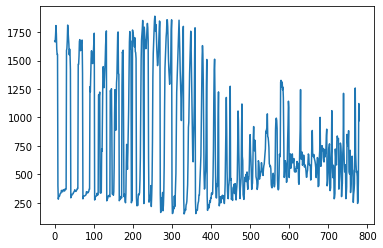

In [437]:
plt.plot(all_kx)
plt.show()

In [438]:
test = np.inner(rlk_flat_norm, rlk_flat_norm)

In [439]:
test

823.1673971549401

In [440]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

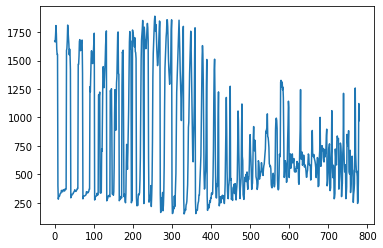

In [441]:
all_kx_smooth = smooth(all_kx, 300)
plt.plot(all_kx)
plt.show()

In [442]:
50*22*3

3300

In [443]:
# dimensions of kernel
kernel_row_size = redlightkernel.shape[0]
kernel_col_size = redlightkernel.shape[1]
print("kernel_row_size", kernel_row_size)
print("kernel_col_size", kernel_col_size)
MAX_ROWS = img.shape[0]
MAX_COLUMNS = img.shape[0]

# perform simple convolution
filtered_image = np.zeros((img.shape[0], img.shape[1],3))
filter_h = redlightkernel # 50 x 22 x 3
print(filter_h.shape)
for row in range(0, MAX_ROWS):
    for col in range(0, MAX_COLUMNS):
        conv_value = 0
        # select corresponding window
        img_partial = img[row:min(MAX_ROWS, row+kernel_row_size), col:min(MAX_COLUMNS, col+kernel_col_size), :]
        img_partial_flat = img_partial.flatten()
        img_partial_flat_norm = (img_partial_flat - np.mean(img_partial_flat))/np.std(img_partial_flat)
#         print(img_partial_flat_norm.shape)
        
        filter_img = filter_h[:min(MAX_ROWS-row, kernel_row_size), :min(MAX_COLUMNS-col, kernel_col_size), :]
        filter_img_flat = filter_img.flatten()
        filter_img_norm = (filter_img_flat - np.mean(filter_img_flat))/np.std(filter_img_flat)
#         print(filter_img_norm.shape)
        
        conv_value = np.dot(img_partial_flat_norm, filter_img_norm)
        
        filtered_image[row, col] = conv_value

kernel_row_size 98
kernel_col_size 44
(98, 44, 3)


In [56]:
# dimensions of kernel
kernel_row_size = redlightkernel.shape[0]
kernel_col_size = redlightkernel.shape[1]
print("kernel_row_size", kernel_row_size)
print("kernel_col_size", kernel_col_size)
MAX_ROWS = img.shape[0]
MAX_COLUMNS = img.shape[0]

# perform simple convolution
filtered_image = np.zeros((img.shape[0], img.shape[1],3))
filter_h = redlightkernel # 50 x 22 x 3
print(filter_h.shape)
for row in range(0, MAX_ROWS):
    for col in range(0, MAX_COLUMNS):
        conv_value = 0
        # select corresponding window
        img_partial = img[row:min(MAX_ROWS, row+kernel_row_size), col:min(MAX_COLUMNS, col+kernel_col_size), :]
        img_partial_flat = img_partial.flatten()
        img_partial_flat_norm = (img_partial_flat - np.min(img_partial_flat))/(np.max(img_partial_flat)-np.min(img_partial_flat))
#         print(img_partial_flat_norm.shape)
        
        filter_img = filter_h[:min(MAX_ROWS-row, kernel_row_size), :min(MAX_COLUMNS-col, kernel_col_size), :]
        filter_img_flat = filter_img.flatten()
        filter_img_norm = (filter_img_flat - np.min(filter_img_flat))/(np.max(filter_img_flat)- np.min(filter_img_flat))
#         print(filter_img_norm.shape)
        
        conv_value = np.dot(img_partial_flat_norm, filter_img_norm)
        
        filtered_image[row, col] = conv_value

kernel_row_size 33
kernel_col_size 15
(33, 15, 3)


In [444]:
thresh_filtered_image = np.zeros(filtered_image.shape)
for row in range(filtered_image.shape[0]):
    for col in range(filtered_image.shape[1]):
        if filtered_image[row, col, 0] > 1500:
            thresh_filtered_image[row, col, 0] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


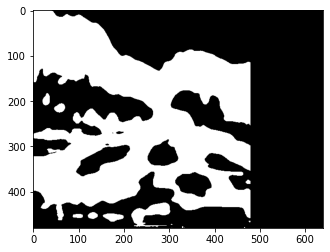

In [445]:
imgplot = plt.imshow(filtered_image)
plt.show()

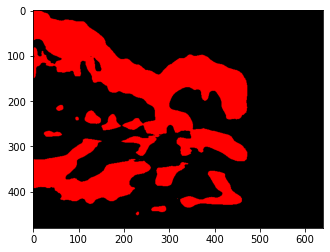

In [446]:
plt.figure()
imgplot = plt.imshow(thresh_filtered_image)
plt.show()

In [447]:
np.min(filtered_image)

-7159.897788387474

In [57]:
count = 0
rl_locations = []
threshold = np.max(filtered_image)*(7/8)
thresh_filtered_image = np.ones(filtered_image.shape)
for row in range(filtered_image.shape[0]):
    for col in range(filtered_image.shape[1]):
        if filtered_image[row, col, 0] > threshold:
            count += 1
            rl_locations.append((row, col))
            thresh_filtered_image[row, col] = 0

In [449]:
print(rl_locations)

[(41, 0), (41, 1), (42, 0), (42, 1), (42, 2), (42, 3), (42, 4), (43, 0), (43, 1), (43, 2), (43, 3), (43, 4), (44, 0), (44, 1), (44, 2), (44, 3), (44, 4), (45, 0), (45, 1), (45, 2), (45, 3), (46, 0), (46, 1), (47, 0), (67, 68), (67, 69), (67, 70), (67, 71), (68, 52), (68, 53), (68, 54), (68, 55), (68, 56), (68, 57), (68, 58), (68, 59), (68, 60), (68, 61), (68, 64), (68, 65), (68, 66), (68, 67), (68, 68), (68, 69), (68, 70), (68, 71), (68, 72), (69, 50), (69, 51), (69, 52), (69, 53), (69, 54), (69, 55), (69, 56), (69, 57), (69, 58), (69, 59), (69, 60), (69, 61), (69, 62), (69, 63), (69, 64), (69, 65), (69, 66), (69, 67), (69, 68), (69, 69), (69, 70), (69, 71), (69, 72), (70, 50), (70, 51), (70, 52), (70, 53), (70, 54), (70, 55), (70, 56), (70, 57), (70, 58), (70, 59), (70, 60), (70, 61), (70, 62), (70, 63), (70, 64), (70, 65), (70, 66), (70, 67), (70, 68), (70, 69), (70, 70), (70, 71), (70, 72), (71, 49), (71, 50), (71, 51), (71, 52), (71, 53), (71, 54), (71, 55), (71, 56), (71, 57), (71

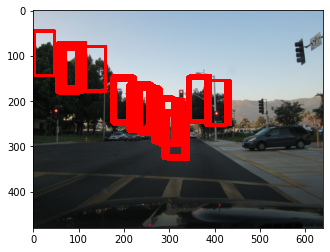

In [450]:
# im = thresh_filtered_image
im = img
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for entry in rl_locations:
    (row, col) = entry
    rect = patches.Rectangle((col, row),kernel_col_size,kernel_row_size,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

[1370.18077967 1370.18077967 1370.18077967]


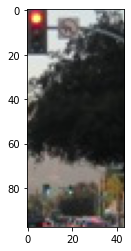

In [451]:
check = filtered_image[176,323]
print(check)
check_img = img[176:(176+kernel_row_size) ,323: (323+kernel_col_size), :]
imgplot = plt.imshow(check_img)
plt.show()

In [61]:
def scale(im, nR, nC):
    nR0 = len(im)     # source number of rows 
    nC0 = len(im[0])  # source number of columns 
    return np.array([[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  
             for c in range(nC)] for r in range(nR)])

def scale_kernel(init_redlightkernel, scale_factor):
    # downsample redlightkernel
#     scale_factor = 2
    #simple image scaling to (nR x nC) size
    nR = int(init_redlightkernel.shape[0]*scale_factor)
    nC = int(init_redlightkernel.shape[1]*scale_factor)
    redlightkernel = scale(init_redlightkernel, nR, nC)
    return redlightkernel

def matched_filter(img, redlightkernel):
    # dimensions of kernel
    kernel_row_size = redlightkernel.shape[0]
    kernel_col_size = redlightkernel.shape[1]
    print("kernel_row_size", kernel_row_size)
    print("kernel_col_size", kernel_col_size)
    MAX_ROWS = img.shape[0]
    MAX_COLUMNS = img.shape[1]

    # perform simple convolution
    filtered_image = np.zeros((img.shape[0], img.shape[1], 3))
    filter_h = redlightkernel # 50 x 22 x 3
    print(filter_h.shape)
    for row in range(0, MAX_ROWS):
        for col in range(0, MAX_COLUMNS):
            conv_value = 0
            # select corresponding window
            img_partial = img[row:min(MAX_ROWS, row+kernel_row_size), col:min(MAX_COLUMNS, col+kernel_col_size), :]
            img_partial_flat = img_partial.flatten()
            img_partial_flat_norm = (img_partial_flat - np.mean(img_partial_flat))/np.std(img_partial_flat)
    #         print(img_partial_flat_norm.shape)

            filter_img = filter_h[:min(MAX_ROWS-row, kernel_row_size), :min(MAX_COLUMNS-col, kernel_col_size), :]
            filter_img_flat = filter_img.flatten()
            filter_img_norm = (filter_img_flat - np.mean(filter_img_flat))/np.std(filter_img_flat)
    #         print(filter_img_norm.shape)

            conv_value = np.dot(img_partial_flat_norm, filter_img_norm)

            filtered_image[row, col] = conv_value
    return filtered_image


def matched_filter_new(img, redlightkernel):
    # dimensions of kernel
    kernel_row_size = redlightkernel.shape[0]
    kernel_col_size = redlightkernel.shape[1]
    print("kernel_row_size", kernel_row_size)
    print("kernel_col_size", kernel_col_size)
    MAX_ROWS = img.shape[0]
    MAX_COLUMNS = img.shape[1]

    # perform simple convolution
    filtered_image = np.zeros((img.shape[0], img.shape[1], 3))
    filter_h = redlightkernel # 50 x 22 x 3
    print(filter_h.shape)
    for row in range(0, MAX_ROWS):
        for col in range(0, MAX_COLUMNS):
            conv_value = 0
            img_partial = img[row:min(MAX_ROWS, row+kernel_row_size), col:min(MAX_COLUMNS, col+kernel_col_size), :]
            img_partial_flat = img_partial.flatten()
            img_partial_flat_norm = (img_partial_flat - np.min(img_partial_flat))/(np.max(img_partial_flat)-np.min(img_partial_flat))
    #         print(img_partial_flat_norm.shape)

            filter_img = filter_h[:min(MAX_ROWS-row, kernel_row_size), :min(MAX_COLUMNS-col, kernel_col_size), :]
            filter_img_flat = filter_img.flatten()
            filter_img_norm = (filter_img_flat - np.min(filter_img_flat))/(np.max(filter_img_flat)- np.min(filter_img_flat))
    #         print(filter_img_norm.shape)

            conv_value = np.dot(img_partial_flat_norm, filter_img_norm)

            filtered_image[row, col] = conv_value
    return filtered_image


        
def threshold_image_filter(filtered_image):
    count = 0
    rl_locations = []
    threshold = np.max(filtered_image)*(5/6)
    thresh_filtered_image = np.ones(filtered_image.shape)
    for row in range(filtered_image.shape[0]):
        for col in range(filtered_image.shape[1]):
            if filtered_image[row, col, 0] > threshold:
                count += 1
                rl_locations.append((row, col))
                thresh_filtered_image[row, col] = 0
    return count, rl_locations, thresh_filtered_image

def plot_annotated_image(img, rl_locations, redlightkernel):
    kernel_row_size = redlightkernel.shape[0]
    kernel_col_size = redlightkernel.shape[1]
    # im = thresh_filtered_image
    im = img
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    for entry in rl_locations:
        (row, col) = entry
        rect = patches.Rectangle((col, row),kernel_col_size,kernel_row_size,linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [28]:
def euclidean_dist(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

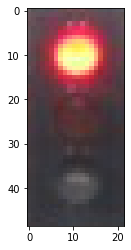

kernel_row_size 49
kernel_col_size 22
(49, 22, 3)


KeyboardInterrupt: 

In [59]:
datapath = '../CS148/RedLights2011_Medium/'
rl_file = 'RL-012.jpg'
rl_img=mpimg.imread(datapath+rl_file)
init_redlightkernel = rl_img[36:85, 297:319, :]
imgplot = plt.imshow(init_redlightkernel)
plt.show()

# redlightkernel = scale_kernel(init_redlightkernel, scale_candidate)
# filtered_image = matched_filter(img, redlightkernel)
# count, rl_locations, thresh_filtered_image = threshold_image_filter(filtered_image)

# scale_range = [1/3, 1/2, 1, 1.5, 2]
scale_range = [1]
for scale_candidate in scale_range:
    redlightkernel = scale_kernel(init_redlightkernel, scale_candidate)
    filtered_image = matched_filter(img, redlightkernel)
    count, rl_locations, thresh_filtered_image = threshold_image_filter(filtered_image)
    if count > 5:
        continue
    else:
        plot_annotated_image(img, rl_locations, redlightkernel)
        break
        
    

In [ ]:
plot_annotated_image(img, rl_locations, redlightkernel)

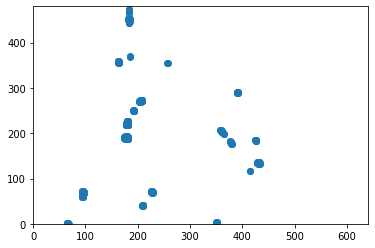

In [31]:
plt.scatter(np.array(rl_locations)[:,0], np.array(rl_locations)[:,1])
plt.ylim(0, MAX_ROWS)
plt.xlim(0, MAX_COLUMNS)
plt.show()

In [32]:
#k means clustering
def cluster_rl_locs(rl_locations):
    K = min(5, len(rl_locations))
    cluster_center_ids = np.random.choice(list(range(len(rl_locations))), K)
    
    while (1):
        iteration = 0
        
        cluster_groups = [[], [], [], [], []]
        cluster_groups_id = [[], [], [], [], []]
        for i in range(len(rl_locations)):
            min_idx = 0
            min_val = 100000
            pt_r = rl_locations[i][0]
            pt_c = rl_locations[i][1]
            for k in range(K):
                center_idx = cluster_center_ids[k]
                center_r = rl_locations[center_idx][0]
                center_c = rl_locations[center_idx][1]
                dist = euclidean_dist(center_r, center_c, pt_r, pt_c)
                if dist < min_val:
                    min_val = dist
                    min_idx = k
            cluster_groups[min_idx].append((pt_r, pt_c))
            cluster_groups_id[min_idx].append(i)

        # update cluster centers
        new_cluster_center_ids = []
        for k in range(K):
            new_center_r = np.mean(np.array(cluster_groups[k])[:,0])
            new_center_c = np.mean(np.array(cluster_groups[k])[:,1])
            min_idx = 0
            min_val = 10000
            for i in range(len(cluster_groups[k])):
                dist = euclidean_dist(new_center_r, new_center_c, cluster_groups[k][i][0], cluster_groups[k][i][1])
                if dist < min_val:
                    min_val = dist
                    min_idx = cluster_groups_id[k][i]
            new_cluster_center_ids.append(min_idx)

        if list(cluster_center_ids) == list(new_cluster_center_ids) or iteration > 20:
            break
        else:
            iteration += 1
            cluster_center_ids = new_cluster_center_ids
            
    return [rl_locations[j] for j in new_cluster_center_ids]

In [33]:
rl_locations_clustered = cluster_rl_locs(rl_locations)

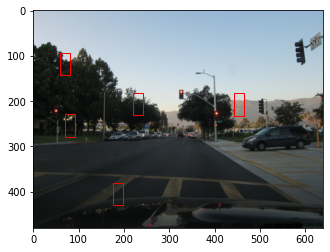

In [34]:
plot_annotated_image(img, rl_locations_clustered, redlightkernel)

In [51]:
def approximate_scale(img):
    # find approximation for scale by red light size
    MAX_ROWS = img.shape[0]
    MAX_COLUMNS = img.shape[1]

    all_counts = []
    for row in range(0, MAX_ROWS):
        for col in range(0, MAX_COLUMNS):
            pixel = list(img[row, col])
            count = 0
            if pixel[0] > 230:
                if pixel[1] > 200 and pixel[2] > 200:
                    count += 1
                    col_plus = col
                    #  begin count
                    while(1):
                        col_plus += 1
                        if col_plus >= MAX_COLUMNS:
                            break

                        pixel = list(img[row, col_plus])
                        if pixel[0] > 230:
                            if pixel[1] > 200 and pixel[2] > 200:
                                count += 1
                            else:
                                break
                        else:
                            break
            if count > 3:
                all_counts.append(count)

    average_count = 10 if len(all_counts)==0 else np.mean(all_counts)
    return average_count/10

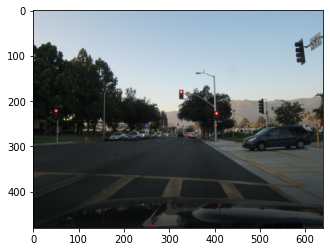

In [37]:
imgplot = plt.imshow(img)
plt.show()

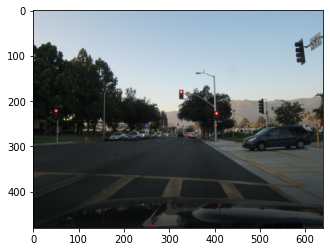

kernel_row_size 33
kernel_col_size 15
(33, 15, 3)


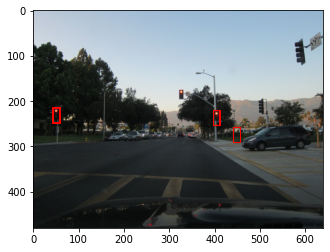

In [62]:
datapath = '../CS148/RedLights2011_Medium/'
file = 'RL-002.jpg'
img=mpimg.imread(datapath+file)
imgplot = plt.imshow(img)
plt.show()

# redlightkernel = scale_kernel(init_redlightkernel, scale_candidate)
# filtered_image = matched_filter(img, redlightkernel)
# count, rl_locations, thresh_filtered_image = threshold_image_filter(filtered_image)

# scale_range = [1/3, 1/2, 1, 1.5, 2]
scale_factor = approximate_scale(img)

redlightkernel = scale_kernel(init_redlightkernel, scale_factor)
filtered_image = matched_filter(img, redlightkernel)
count, rl_locations, thresh_filtered_image = threshold_image_filter(filtered_image)
plot_annotated_image(img, rl_locations, redlightkernel)
        

In [53]:
im_test = np.array(Image.open(datapath+file))

In [55]:
im_test.shape

(480, 640, 3)